#ATP Men's Tennis Hierarchy Inference Using the SpringRank Algorithm
####using the inferred hierarchy to predict the outcomes of future games
####and simulating the results of these predictions using the Kelly Criterion to size bets

###Notes
Not all of the code is contained in this jupyter file. Clone the github repository corresponding to this project if you want to actually run it. This notebook is just a summary.

[tennis_hierarchy_inference_repo](https://github.com/wimmeldj/tennis_hierarchy_inference)

###The SpringRank Algorithm

[SpringRank,](https://arxiv.org/abs/1709.09002) a recently published ranking algorithm, can be used for inferring hierarchies and predicting edge direction in directed networks. This is useful in the study of various complex systems characterized by pairwise interactions between members of the system where the members’ interactions are influenced by prestige/hierarchical ranking. Bacco, Larremore, and Moore’s paper provides as examples university hiring preferences, where some university might be more likely to hire an applicant from a university equally or more prestigious than their own, and mating preferences in animal species (those belonging to birds, primates, elephants…) where that species’ social groups are characterized by dominant animals asserting themselves over subordinate animals.

###What We're Doing

Using ATP Men’s Tennis Tour data collected from [tennis-data.co.uk](http://www.tennis-data.co.uk/alldata.php), we will form eight sets of historical data where the first set is the results of all matches played from 2000-2009, the second set: 2000-2010... the eighth set: 2000-2016. This data will be in the form of an adjacency matrix, because the SpringRank algorithm expects this. In the network that is each data set, each node will represent a particular tennis player, and an edge from player i to j means "i beat j." We will also generate a separate group of eight sets of past data where the the nodes in the network they represent correspond to a particular player and a play surface. So in this group, we could have the same player represented four times across the network (three types of surface: clay, hard, grass, carpet) and each of those four nodes will rank differently depending on how well a particular player performs on each of them. Also using this data set, we will form sixteen tournament simulation data sets (2011 excluding surface, 2011 including surface, 2012 excluding surface, ..., 2017 including surface) where each set is the outcomes of all the matches of that particular year's tournament and the average moneyline odds being offered for the players of each match. 

Our program will implement logic to calculate the SpringRank of players from a set of historical data. It will run through a set of matches, looking at the players in each match, looking up the SpringRank of those players, and calculating the probability of one beating the other. If a calculated probability (one derived from the SpringRank ranks of the players) is significantly higher than his probability of winning inferred from the moneyline odds being offered for that player, it would make sense to bet some amount of money on that player. We're looking for alpha by laying bets on undervalued players.

We will use the [Kelly Criterion](https://en.wikipedia.org/wiki/Kelly_criterion) to size our bets, calculating it from the implied probability of the moneyline odds being offered for a player and our "real" probabilities derived from the SpringRank algorithm. Our program will only lay a bet on a player if his "real" probability of winning is .45 higher than his inferred probability of winning.

We will test our program a total of sixteen times, using the sixteen historical data sets (eight that include the surface played on and eight that don't) to infer the SpringRank hierarchy, and test our program on the eight tournament simulation data sets. Once a match is "over" (our program has decided to bet on it or not) we will incorporate the outcome of that match into the historical data set being tested and re-calculate the SpringRank when necessary. 

###Data Processing
get_data.py, located in the tennis_prep dir of our project is a basic csv data retrieval python script I've made. It can be run from the command line in the form below and expects at least two arguments, the start date and end date of the data you want to collate. It expects a data folder containing all the tennis csv files to be in its current dir. The output file will be unique to the command entered and won't overwrite itself, so a bash script can be run to generate the necessary data sets.

<pre>The following options can be added when running get_data.py:
    --surface | to include surface type in the output file
    --odds    | to include odds in the output file (for the tournament simulation set)
</pre>

All the necessary data files are generated with the bash script collate_data.sh located in the tennis_prep dir. Code is below:

In [ ]:
#!/bin/bash
for i in 2010 2011 2012 2013 2014 2015 2016 2017
do
    python3 get_data.py 2000 $i
    python3 get_data.py 2000 $i --surface
    python3 get_data.py $i $(($i + 1)) --odds
    python3 get_data.py $i $(($i + 1)) --surface --odds
done


###Running the Main Program
We are done processing our data and can run the simulations by choosing one of the historical data sets (in the form: 2000-2010_output_Nodds_Nsurface.dat, 2000-2010_output_Nodds_surface, etc.) and its corresponding tournament simulation sets (in the form: 2010-2011_output_odds_Nsurface.dat, etc.) We will rename these data sets historical_matches.dat and unplayed_matches.dat, respectively, and move the files into the spring_rank/SpringRank/data dir. A script could be made to do this as well.

When the simulation is done, you will see a plot of our bankroll over time and some useful information in the console. In order to run the simulation again, it is necessary to _at least_ clear the sRank.dat file generated by the program and the historical_matches.dat file. But, of course, if you want to run a simulation for a different year or different condition (i.e. either including or excluding surfaces), you will have to clear the unplayed_matches.dat file.

You can run the program with the optional --verbose flag to show all console output. If you want to redirect the final results to an output file, this should NOT be on.


##Simulation Results

In [2]:
import pickle
from matplotlib import pyplot as plt
from matplotlib import style

style.use('grayscale')

plots = [[0 for x in range(2)] for y in range (8)]
plots_surface = [[0 for x in range(2)] for y in range (8)]

j = 0
for i in [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]:
    with open ('pyplot_list_data/' + str(i) + '_outX', 'rb') as inFile:
        plots[j][0] = pickle.load(inFile)
    with open ('pyplot_list_data/' + str(i) + '_outY', 'rb') as inFile:
        plots[j][1] = pickle.load(inFile)
    j += 1
j = 0

for i in [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]:
    with open('pyplot_list_data/' + str(i) + '_surface_outX', 'rb') as inFile:
        plots_surface[j][0] = pickle.load(inFile)
    with open ('pyplot_list_data/' + str(i) + '_surface_outY', 'rb') as inFile:
        plots_surface[j][1] = pickle.load(inFile)
    j += 1



##Simulations that don't consider surface played on

####2010

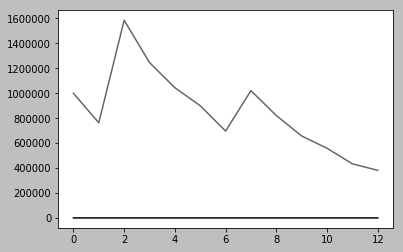

In [81]:
plt.figure(1)
plt.plot(plots[0][0])
plt.plot(plots[0][1])
plt.show()

####2011

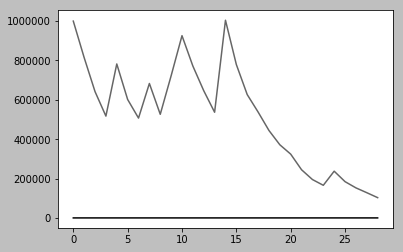

In [82]:
plt.figure(2)
plt.plot(plots[1][0])
plt.plot(plots[1][1])
plt.show()

####2012

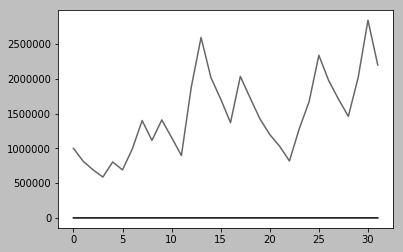

In [83]:
plt.figure(3)
plt.plot(plots[2][0])
plt.plot(plots[2][1])
plt.show()

####2013

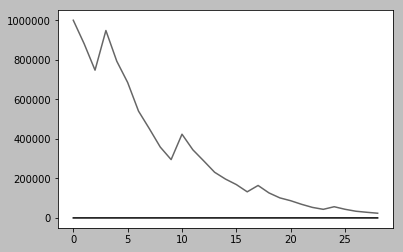

In [84]:
plt.figure(4)
plt.plot(plots[3][0])
plt.plot(plots[3][1])
plt.show()

####2014

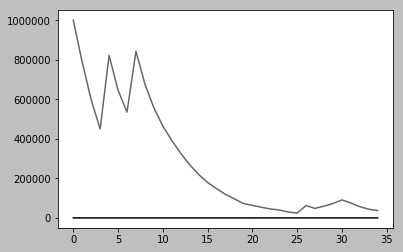

In [85]:
plt.figure(5)
plt.plot(plots[4][0])
plt.plot(plots[4][1])
plt.show()

####2015

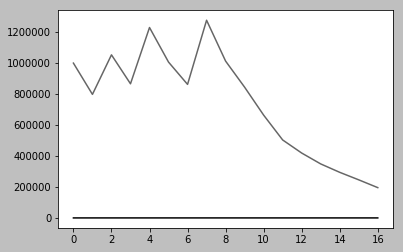

In [86]:
plt.figure(6)
plt.plot(plots[5][0])
plt.plot(plots[5][1])
plt.show()

####2016

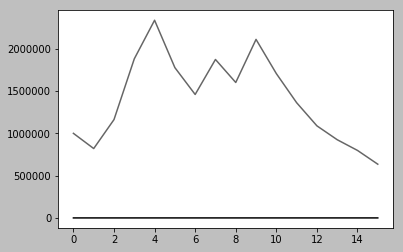

In [87]:
plt.figure(7)
plt.plot(plots[6][0])
plt.plot(plots[6][1])
plt.show()

####2017

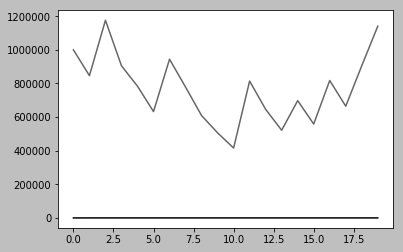

In [88]:
plt.figure(8)
plt.plot(plots[7][0])
plt.plot(plots[7][1])
plt.show()

##Simulations that _do_ consider surface played on

####2010

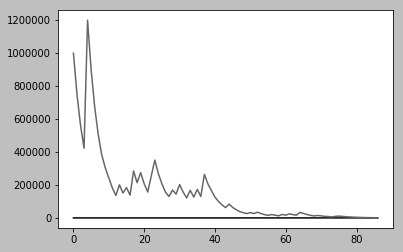

In [89]:
plt.figure(1)
plt.plot(plots_surface[0][0])
plt.plot(plots_surface[0][1])
plt.show()

####2011

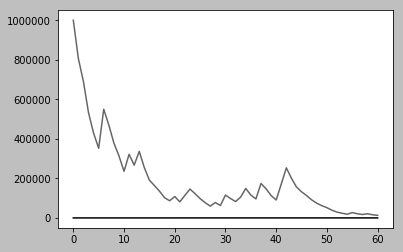

In [90]:
plt.figure(2)
plt.plot(plots_surface[1][0])
plt.plot(plots_surface[1][1])
plt.show()

####2012

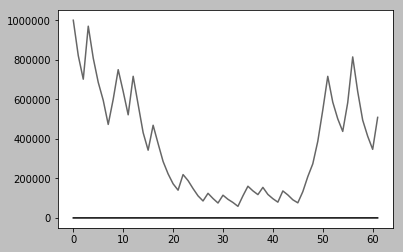

In [91]:
plt.figure(3)
plt.plot(plots_surface[2][0])
plt.plot(plots_surface[2][1])
plt.show()

####2013

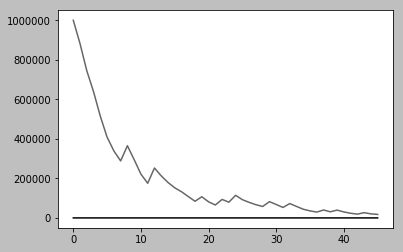

In [92]:
plt.figure(4)
plt.plot(plots_surface[3][0])
plt.plot(plots_surface[3][1])
plt.show()

####2014

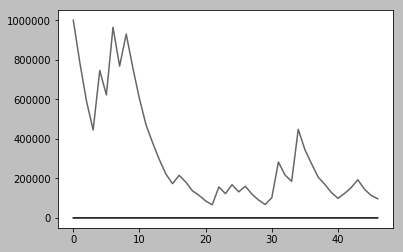

In [93]:
plt.figure(5)
plt.plot(plots_surface[4][0])
plt.plot(plots_surface[4][1])
plt.show()

####2015

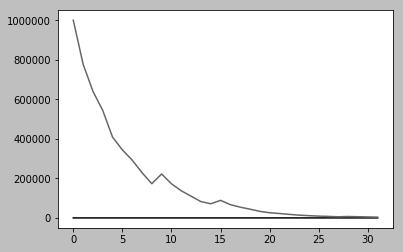

In [94]:
plt.figure(6)
plt.plot(plots_surface[5][0])
plt.plot(plots_surface[5][1])
plt.show()

####2016

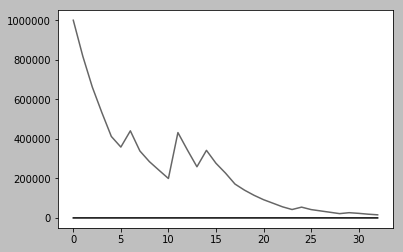

In [95]:
plt.figure(7)
plt.plot(plots_surface[6][0])
plt.plot(plots_surface[6][1])
plt.show()

####2017

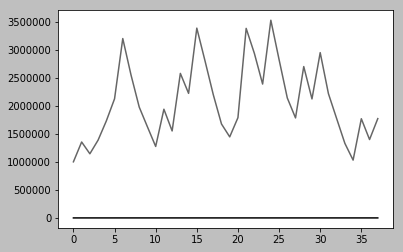

In [96]:
plt.figure(8)
plt.plot(plots_surface[7][0])
plt.plot(plots_surface[7][1])
plt.show()

###Console printout for each simulation
<pre>
FINAL BAL   | Final Balance of our bankroll
avg win div | divergence in "read" probability and inferred probability in cases where we won
avg los div | divergence in cases where we lost
avg win gc  | average number of games in which players had played each other before where we won
avg los gc  | "" where we lost
med win gc  | median
med los gc  | median
winners correct | number of matches where the "real" probability was > .50 for the winner
</pre>

In [ ]:
2010
========
FINAL BAL: 381466.05138783174
avg win div: 0.4978711949122868
avg los div: 0.522063831487187
avg win gc: 0.0
avg los gc: 0.1
med win gc: 0.0
med los gc: 0.0
winners correct: 1141 / 1731 = 0.6591565569035239
Principal: 1000000

2010 - include surface
========
FINAL BAL: 962.7830983584
avg win gc: 0.0
avg los gc: 0.03125
med win gc: 0.0
med los gc: 0.0
avg win div: 0.5979568482115792
avg los div: 0.6282859729183109
winners correct: 311 / 568 = 0.5475352112676056
Principal: 1000000
Halting! Bankroll is less than a thousandth of its original value.

2011
========
FINAL BAL: 102998.54250992315
avg win div: 0.5163599512954157
avg los div: 0.5749648368888068
avg win gc: 1.5
avg los gc: 0.045454545454545456
med win gc: 0.5
med los gc: 0.0
winners correct: 1813 / 2665 = 0.6803001876172607
Principal: 1000000

2011 - include surface
========
FINAL BAL: 12951.554435050883
avg win div: 0.5150917354520362
avg los div: 0.5619744733670109
avg win gc: 0.13333333333333333
avg los gc: 0.06666666666666667
med win gc: 0
med los gc: 0
winners correct: 1800 / 2665 = 0.6754221388367729
Principal: 1000000

2012
========
FINAL BAL: 2196383.440423699
avg win div: 0.5203638984117984
avg los div: 0.554138392127294
avg win gc: 0.4166666666666667
avg los gc: 0.47368421052631576
med win gc: 0.0
med los gc: 0
winners correct: 1765 / 2606 = 0.6772831926323868
Principal: 1000000

2012 - include surface
========
FINAL BAL: 508600.28074121143
avg win div: 0.540539940487454
avg los div: 0.5561285153562741
avg win gc: 0.0
avg los gc: 0.05
med win gc: 0
med los gc: 0.0
winners correct: 1766 / 2606 = 0.6776669224865695
Principal: 1000000

2013
========
FINAL BAL: 23739.28585140483
avg win div: 0.5014562841881447
avg los div: 0.5699595622609247
avg win gc: 0.25
avg los gc: 0.4166666666666667
med win gc: 0.0
med los gc: 0.0
winners correct: 1758 / 2630 = 0.6684410646387833
Principal: 1000000

2013 - include surface
========
FINAL BAL: 17700.505178514708
avg win div: 0.5411068138270899
avg los div: 0.5648645270266676
avg win gc: 0.1
avg los gc: 0.05714285714285714
med win gc: 0.0
med los gc: 0
winners correct: 1751 / 2630 = 0.6657794676806084
Principal: 1000000

2014
========
FINAL BAL: 37404.468334225174
avg win div: 0.5526845890600557
avg los div: 0.5844959858421582
avg win gc: 0.0
avg los gc: 0.03571428571428571
med win gc: 0.0
med los gc: 0.0
winners correct: 1745 / 2600 = 0.6711538461538461
Principal: 1000000

2014 - include surface
========
FINAL BAL: 96951.52693868308
avg win div: 0.5499484656422067
avg los div: 0.6532716430469103
avg win gc: 0.0
avg los gc: 0.0
med win gc: 0
med los gc: 0
winners correct: 1727 / 2600 = 0.6642307692307692
Principal: 1000000

2015
========
FINAL BAL: 195569.52332945622
avg win div: 0.5117645235790006
avg los div: 0.5814903922806098
avg win gc: 0.3333333333333333
avg los gc: 0.07692307692307693
med win gc: 0
med los gc: 0
winners correct: 1792 / 2629 = 0.6816279954355268
Principal: 1000000

2015 - include surface
========
FINAL BAL: 3871.9856556027853
avg win div: 0.4668473511502995
avg los div: 0.5657349616438889
avg win gc: 0.0
avg los gc: 0.10714285714285714
med win gc: 0
med los gc: 0.0
winners correct: 1748 / 2629 = 0.6648915937618867
Principal: 1000000

2016
========
FINAL BAL: 635210.4079846279
avg win div: 0.47906687642467755
avg los div: 0.5802656447077826
avg win gc: 0.0
avg los gc: 0.3
med win gc: 0
med los gc: 0.0
winners correct: 1755 / 2625 = 0.6685714285714286
Principal: 1000000

2016 - include surface
========
FINAL BAL: 15660.726805788467
avg win div: 0.5184892020955586
avg los div: 0.5731288739718566
avg win gc: 0.0
avg los gc: 0.037037037037037035
med win gc: 0
med los gc: 0
winners correct: 1741 / 2625 = 0.6632380952380953
Principal: 1000000

2017
========
FINAL BAL: 1140842.8028890048
avg win div: 0.5288954434653624
avg los div: 0.5836638145543532
avg win gc: 0.0
avg los gc: 0.0
med win gc: 0
med los gc: 0.0
winners correct: 1699 / 2631 = 0.6457620676548841
Principal: 1000000

2017 - include surface
========
FINAL BAL: 1770069.3319285458
avg win div: 0.5400489984097339
avg los div: 0.5985174222205735
avg win gc: 0.0
avg los gc: 0.045454545454545456
med win gc: 0
med los gc: 0.0
winners correct: 1724 / 2631 = 0.6552641581147852
Principal: 1000000

##Conclusion

These results look fairly unpromising. The only simulations in which we made money were the 2017 simulations, where the simulation that didn't include the play surface resulted in a net gain of ~14.1%, where the one that did include the play surface resulted in a net gain of ~77%, and the 2012 simulation that didn't include the surface resulted in a net gain of ~120%. The positive outcome in the 2017 simulations I can attribute to the fact that the static "bet only if divergence in implied probability and real probability is greater than .45" condition I set in the program was arrived at through testing its effects on the 2017 data. _If_ this property could somehow be tuned before a tournament or correlated with something measurable in the historic data, we could have a profitable system. But I'm not sure how this could be done or if it's possible.

The 2012 simulation I would like to call a fluke. Though, it might be worth re-running the simulations with different betting conditions. For example, it seems that we win more games where the players have played each other fewer times. This could be incorporated into the bet conditions by calling the "get_number_of_interactions()" function in atp_mens_testing.py.